In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [88]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [107]:
def compute_cost(x,y,w,b):
    m = len(x)
    cost = 0 
    for i in range(m):
        f = np.dot(x[i],w) +b
        cost = cost + (f -y[i])**2
    cost = cost/(2*m)
    return cost
    

In [108]:
jc =[]
for i in range(500):
    jc.append(compute_cost(x_train,y_train,w_init-i,b_init))

print("cost \n",jc)

cost 
 [1.5578904045996674e-12, 1261774.3361372987, 5047097.338941264, 11355969.008411894, 20188389.344549198, 31544358.34735316, 45423876.01682379, 61826942.352961086, 80753557.35576506, 102203721.0252357, 126177433.36137299, 152674694.36417696, 181695504.03364757, 213239862.36978492, 247307769.37258884, 283899225.0420595, 323014229.37819666, 364652782.3810007, 408814884.05047137, 455500534.3866086, 504709733.3894126, 556442481.0588832, 610698777.3950205, 667478622.3978244, 726782016.0672951, 788608958.4034324, 852959449.4062363, 919833489.0757068, 989231077.4118443, 1061152214.4146482, 1135596900.0841188, 1212565134.4202561, 1292056917.4230602, 1374072249.092531, 1458611129.4286683, 1545673558.431472, 1635259536.1009426, 1727369062.4370801, 1822002137.4398842, 1919158761.1093543, 2018838933.4454918, 2121042654.4482958, 2225769924.117767, 2333020742.4539037, 2442795109.456708, 2555093025.1261783, 2669914489.4623156, 2787259502.46512, 2907128064.13459, 3029520174.4707274, 3154435833.47

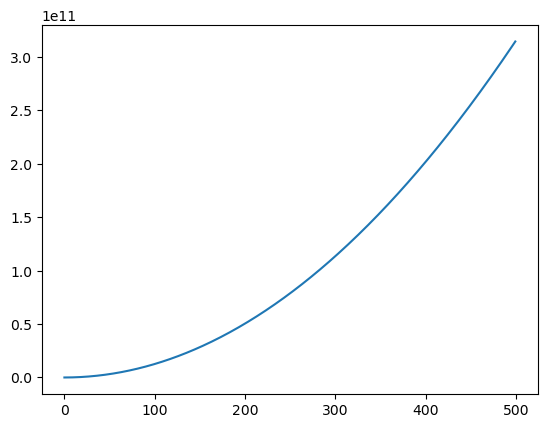

In [109]:
plt.plot(jc)
plt.show()

In [94]:
#computing gradient
def gradient(x,y,w,b):
    m ,n = x.shape # it return a tuple
    jb =0.
    jw = np.zeros(n)
    for i in range(m):
        f = np.dot(x[i],w) + b
        err = f-y[i]
        jb += err # sum for parameter b
        for j in range(n):
            jw[j]+= err * x[i,j]
            
        jw = jw/m  # jw is vector 
        jb = jb/m  # jb is scaler
    return jw ,jb

    

In [95]:
# coumpute gradient

tm_jw , tm_jb = gradient(x_train, y_train,w_init,b_init)

print(f"jw = {tm_jw} \n jb = {tm_jb}")

jw = [-7.29064326e-04 -1.65810878e-06 -7.87387733e-07 -2.30049649e-05] 
 jb = -6.062108552753301e-07


In [125]:
# Gradient descent

def gradient_descent(x,y,w,b,alpha):
    m = x.shape[0]
    j =[]
    
    for i in range(1000):
        jw ,jb = gradient(x,y,w,b)
        
        w = w- alpha* jw
        b= b- alpha*jb
        
        j.append(compute_cost(x,y,w,b))
    
    return w,b,j
        
        
    
    

w =[  0.39133535  18.75376741 -53.36032453 -26.42131618] 
 b = 785.1811367994092 



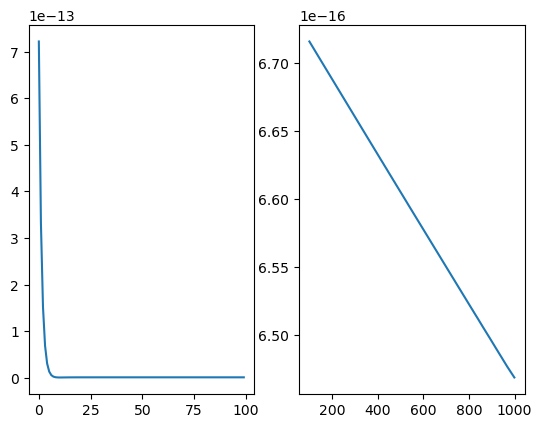

In [135]:
w,b,j = gradient_descent(x_train,y_train,w_init,b_init,5.0e-7)

print(f"w ={w} \n b = {b} \n")
fig , (gr1,gr2) = plt.subplots(1,2)
gr1.plot(j[:100])
gr2.plot(100+ np.arange(len(j[100:])), j[100:])
plt.show()